<a href="https://colab.research.google.com/github/RayOfLight07/Deep-Learning/blob/main/DL_LAB_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Deep learning Lab_________________________________________________________________________Name: Deepasnhu Rathore     
B.Tech. 5th Sem.
#**Experiment:- 04**
# Introduction to Pretrained models and transfrer learning using imgae identification
a.Introduction Of Pretrained models.

Models which are trained on a large data set for a required task. as we don't have to build and train a model from very basic step, which requires a large amount of data and computational resouces, we can use a pretrained model as a starting point.

Advantages-

1.Reduced training time

2.Less data required

3.Improved performance

b.Perform classification task with pretrained models using image data.


Date:26\08\2025____________________________________________________________________________________SAP: 500124406

In [ ]:
import os
import pandas as pd
import numpy as np
from glob import  glob
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import torch
from torch.utils.data import Dataset,DataLoader
from torch.utils.data.dataset import Subset
from torchvision import transforms as T
from torch import nn
from torchvision.models import resnet50
from sklearn.model_selection import KFold,StratifiedKFold


device = (torch.device('cuda') if torch.cuda.is_available()
          else torch.device('cpu'))
print(f'Training on device {device}.')

seed = 42
torch.manual_seed(seed)

# Update dataset_dir to reflect where you upload the dataset in Colab
# For example, if you upload to /content/, use '/content/'
dataset_dir = '/content/'
photo_dir = '/content/petfinder-pawpularity-score/train/' # Update this path if necessary

photo_pathes = glob(os.path.join(photo_dir,'**.jpg'))
model_name = 'resnet50_pretrained'
model_path = model_name

Training on device cpu.


In [ ]:
from google.colab import files

# Upload the resnet50.pth file
uploaded = files.upload()


Saving resnet50.pth to resnet50.pth


In [ ]:
import torch
import torchvision.models as models
import torch.nn as nn

# Load ResNet50 architecture with default pretrained weights
model = models.resnet50(weights='ResNet50_Weights.DEFAULT')

# Replace final layer to match the number of classes in your task (e.g., 2 for binary classification)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)

# If you still need to load weights from your custom .pth file after this,
# you would do it here, ensuring the model architecture matches the .pth file's
# architecture *before* the final layer replacement.
# For example:
# model.load_state_dict(torch.load("/content/your_custom_weights.pth", map_location="cpu"))


# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Set model to evaluation mode
model.eval()

print("Model loaded and ready for inference.")

Model loaded and ready for inference.


Saving orange-tabby-outside.avif to orange-tabby-outside.avif


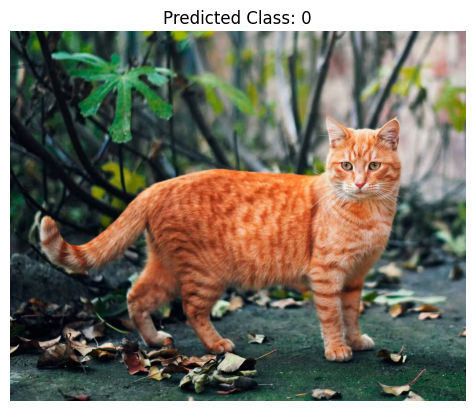

In [ ]:
from google.colab import files
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Upload an image for testing
uploaded = files.upload()

# Get image filename
img_path = list(uploaded.keys())[0]

# Preprocess the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Inference
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

# Show image and prediction
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted.item()}")  # 0 or 1
plt.show()

In [ ]:
labels = {0: 'CAT', 1: 'DOG'}
print(f"Predicted Class: {labels[predicted.item()]}")


Predicted Class: CAT
